In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/BABA.csv')

In [3]:
df_sp500 = pd.read_csv('/content/AMZN (1).csv')

In [4]:
df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,134.130005,137.748993,133.029999,136.699997,16708400,0.0,0.0
1,2019-01-03 00:00:00-05:00,134.270004,134.869995,129.830002,130.600006,19531300,0.0,0.0
2,2019-01-04 00:00:00-05:00,134.259995,141.080002,133.660004,139.750000,22845400,0.0,0.0
3,2019-01-07 00:00:00-05:00,140.550003,144.080002,139.009995,143.100006,17239000,0.0,0.0
4,2019-01-08 00:00:00-05:00,145.000000,147.550003,142.059998,146.789993,16487600,0.0,0.0
...,...,...,...,...,...,...,...,...
1107,2023-05-25 00:00:00-04:00,80.589996,80.709999,78.120003,78.779999,21811600,0.0,0.0
1108,2023-05-26 00:00:00-04:00,79.900002,81.566002,78.400002,80.970001,16399200,0.0,0.0
1109,2023-05-30 00:00:00-04:00,80.120003,80.699997,78.169998,78.669998,21209600,0.0,0.0
1110,2023-05-31 00:00:00-04:00,79.580002,79.665001,77.769997,79.550003,16206300,0.0,0.0


In [5]:
df_sp500

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.96,159662000,0,0
1,2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.01,139512000,0,0
2,2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.77,183652000,0,0
3,2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.48,159864000,0,0
4,2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.83,177628000,0,0
...,...,...,...,...,...,...,...,...
1107,2023-05-25 00:00:00-04:00,116.629997,116.870003,114.309998,115.00,66496700,0,0
1108,2023-05-26 00:00:00-04:00,116.040001,121.500000,116.019997,120.11,96779900,0,0
1109,2023-05-30 00:00:00-04:00,122.370003,122.919998,119.860001,121.66,64314800,0,0
1110,2023-05-31 00:00:00-04:00,121.449997,122.040001,119.169998,120.58,72800800,0,0


In [6]:
df = pd.concat([df['Close'], df_sp500['Close']], axis=1, join='inner')
df.columns = ['AMZN', 'BABA_ex']
print(df.tail())

           AMZN  BABA_ex
1107  78.779999   115.00
1108  80.970001   120.11
1109  78.669998   121.66
1110  79.550003   120.58
1111  83.000000   122.77


In [7]:

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [8]:
df

,AMZN,BABA_ex
0,136.699997,76.96
1,130.600006,75.01
2,139.750000,78.77
3,143.100006,81.48
4,146.789993,82.83
...,...,...
1107,78.779999,115.00
1108,80.970001,120.11
1109,78.669998,121.66
1110,79.550003,120.58


In [9]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.1 MB/s eta 0:00:00


In [10]:
exog_vars = 'BABA_ex'  # Danh sách các biến độc lập
endog_var = 'AMZN'  # Biến phụ thuộc

In [11]:
endog_train = train_data[endog_var]
exog_train = train_data[exog_vars]

In [12]:
import statsmodels.api as sm

In [13]:
model = sm.tsa.ARIMA(endog_train, order=(1, 0, 1), exog=exog_train)

# Huấn luyện mô hình
model_fit = model.fit()


In [14]:
# Sử dụng dữ liệu kiểm tra và validation để đánh giá mô hình
endog_test = test_data[endog_var]
exog_test = test_data[exog_vars]

endog_val = val_data[endog_var]
exog_val = val_data[exog_vars]

In [15]:
# Dự đoán giá trị cho tập kiểm tra
forecast_test = model_fit.get_forecast(steps=len(test_data), exog=exog_test)
predicted_values_test = forecast_test.predicted_mean

In [16]:
# Dự đoán giá trị cho tập validation
forecast_val = model_fit.get_forecast(steps=len(val_data), exog=exog_val)
predicted_values_val = forecast_val.predicted_mean

In [17]:
# Dự báo 30 ngày tiếp theo
forecast_all = model_fit.get_forecast(steps=30, exog=exog_train[-30:])  # Dự báo 30 ngày tiếp theo

In [18]:
# Trích xuất giá trị dự đoán và khoảng tin cậy cho toàn bộ tập dữ liệu
predicted_values_all = forecast_all.predicted_mean
confidence_interval_all = forecast_all.conf_int()

In [19]:
print(predicted_values_all)
print(confidence_interval_all)

778    140.019962
779    142.939127
780    143.715125
781    144.025304
782    143.208181
783    144.271952
784    143.405198
785    143.245997
786    142.014637
787    145.192017
788    143.202330
789    140.990983
790    140.392820
791    140.116372
792    139.555280
793    142.875341
794    143.028575
795    140.148859
796    141.150311
797    138.882576
798    137.086212
799    133.705888
800    126.859520
801    128.619251
802    125.298605
803    124.677932
804    125.544512
805    129.221323
806    133.881406
807    135.414096
Name: predicted_mean, dtype: float64
     lower AMZN  upper AMZN
778  130.969225  149.070700
779  130.408700  155.469554
780  128.500644  158.929606
781  126.551680  161.498928
782  123.751611  162.664751
783  123.031016  165.512888
784  120.531844  166.278552
785  118.861533  167.630461
786  116.218946  167.810328
787  118.069295  172.314739
788  114.824871  171.579788
789  111.421795  170.560171
790  109.687494  171.098147
791  108.324462  171.908282
792

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Tính MSE cho tập kiểm tra
mse_test = mean_squared_error(test_data[endog_var], predicted_values_test)
print("MSE (Test):", mse_test)

# Tính RMSE cho tập kiểm tra
rmse_test = np.sqrt(mse_test)
print("RMSE (Test):", rmse_test)

MSE (Test): 1639.1020630103935
RMSE (Test): 40.48582545793519


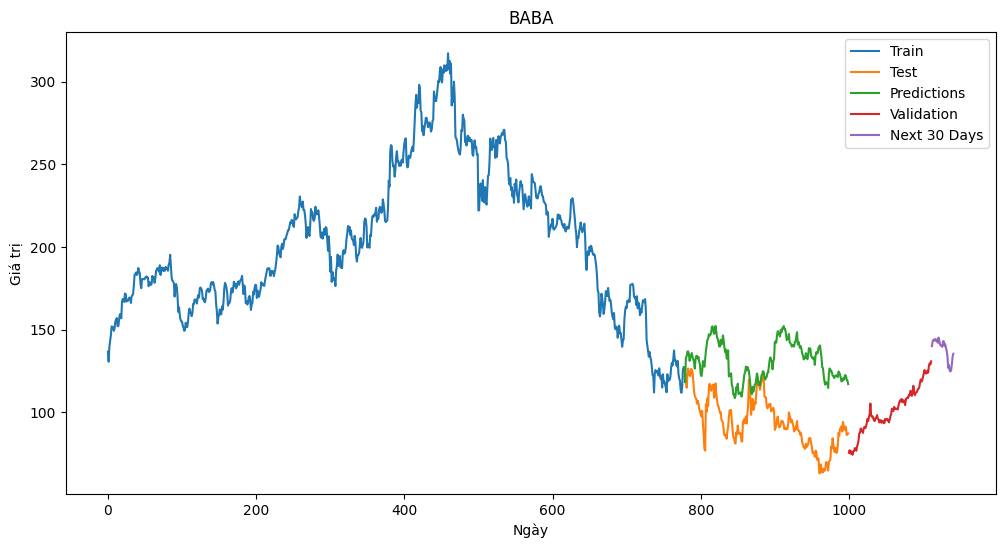

In [21]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[endog_var], label='Train')
plt.plot(test_data.index, test_data[endog_var], label='Test')

plt.plot(test_data.index, predicted_values_test, label='Predictions')
plt.plot(val_data.index, predicted_values_val, label='Validation')
next_30_days_index = pd.RangeIndex(start=df.index[-1] + 1, stop=df.index[-1] + 31, step=1)
plt.plot(next_30_days_index, predicted_values_all, label='Next 30 Days')

# Đặt tên cho các trục và tiêu đề
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('BABA')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()
